In [81]:

import numpy as np
import segyio
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy.signal import butter, lfilter

import matplotlib

#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

#%matplotlib inline
%matplotlib notebook
sourcefile='D:/small.sgy'
sourcefile='D:/Vawn.SGY'
sourcefile="C:/Users/koushb/OneDrive - Husky Energy/ML/ML_S_Int/For GoogleML data/data/Cropped SGY/DV.sgy"
src=segyio.open(sourcefile)


def readsegy(sourcefile):
    src=segyio.open(sourcefile)
    a=[]
    for inline in src.ilines:
        a.append(np.array(src.iline[inline]).T)
    a=np.array(a)
    a=np.swapaxes(a,0,1)
    return(a)

def traceij(iline,xline):

    ii= np.where(src.ilines == iline)[0][0]
    jj=np.where(src.xlines == xline)[0][0]

    ij=ii*len(src.xlines)+jj
    #checkit
    if src.header[ij][segyio.TraceField.INLINE_3D] != iline :
            raise Exception('Extracted inline does not match with header')
    if src.header[ij][segyio.TraceField.CROSSLINE_3D] != xline :
            raise Exception('Extracted crossline does not match with header')
    return(src.trace[ij])



def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut=15, highcut=150, fs=1000, order=6):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def apply_filter(data):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def do_filter(x):
    file_name=filters.value
    
    data = np.load(file_name, fix_imports=True, encoding='bytes') # array containing dict, dtype 'object'    
    b,a=data['ba']
    #print(file_name,b,a)
    #print(x.shape[-1])
    for i in range(x.shape[-1]):    
        x[...,i]=y = lfilter(b, a, x[...,i])
    return(x)

    

def do_BP(x):
    #print('doing BP...')
    for i in range(x.shape[-1]):    
        x[...,i]=butter_bandpass_filter(x[...,i],order=6,
                              fs = 1000.0,
                              lowcut = LB.value,
                              highcut = HB.value) 
    return(x)

def il_plot(inline,cmap,interp_method,clear=False):
    #inline=inline['new']
    t=np.array(src.iline[inline]).T
#    if iBP.value:
        #print(trace.shape,trace.shape[-1])
#        t=do_BP(t) 
    #plt.figure('inline')
    if filters.value != 'None':
        do_filter(t)

    if clear:
        plt.clf()        
    plt.imshow(t,cmap=cmap,interpolation=interp_method,vmin=vmin.value,vmax=vmax.value)
    if clear:
        plt.colorbar()
    
    #plt.title='inline='+str(inline)
    
    
    
def xl_plot(xline,cmap,interp_method,clear=False):
    #xline=xline['new']
    t=np.array(src.xline[xline]).T
#    if iBP.value:
        #print(trace.shape,trace.shape[-1])
#        t=do_BP(t) 
    if filters.value != "None":
        do_filter(t)

    #plt.figure('Xline')
    if clear:
        plt.clf()
    plt.imshow(t,cmap=cmap,interpolation=interp_method,vmin=vmin.value,vmax=vmax.value)
    if clear:
        plt.colorbar()

    
    
def z_plot(z,cmap,interp_method,clear=False):
    #xline=xline['new']
    t=np.array(src.depth_slice[z])
#    if iBP.value:
        #print(trace.shape,trace.shape[-1])
#        t=do_BP(t) 
    if filters.value != 'None':
        do_filter(t)

    
    #plt.figure('Time Slice')
    if clear:
        plt.clf()
    plt.imshow(t,cmap=cmap,interpolation=interp_method,vmin=vmin.value,vmax=vmax.value)
    if clear:
        plt.colorbar()

def t_plot(inline,xline):

    trace=np.array(traceij(inline,xline)).reshape(-1,1)
#    if iBP.value:
#        print(trace.shape,trace.shape[-1])
#        trace=do_BP(trace) 
    if filters.value != 'None':
        do_filter(trace)

    Z=src.samples

    
    plt.clf()
    plt.plot(trace,Z)
    plt.xlim(vmin.value,vmax.value)
    plt.ylim(Z[-1],Z[0])
      



    
    
def plottm(tmp):
    #print(tmp)
    inline=il_Slider.value
    xline=xl_Slider.value
    print(inline,xline)
    
    t1=np.array(src.iline[inline]).T
    t2=np.array(src.xline[xline]).T
    plt.imshow(t1)
    plt.show()
    plt.imshow(t2)
 
#https://gis.stackexchange.com/questions/200180/convert-and-plot-python-basemap-and-netcdf-file-in-utm-zone-45n/201155

In [82]:
#np_s=readsegy(sourcefile)

il_min=src.ilines[0]
il_max=src.ilines[-1]

xl_min=src.xlines[0]
xl_max=src.xlines[-1]

#print(src.samples)


In [83]:

t=0

#il_Slider= widgets.IntSlider(min=il_min,max=il_max,description='Inline')
def on_value_change(change):  
    global t
#    if change['owner'].description=='Plot Trace':        
    if itrace.value:
        t_plot(il_Slider.value,xl_Slider.value)
        t=0
    elif change['owner'].description=='Plot Trace':        
        il_plot(il_Slider.value,colormap.value,interpolation.value,clear=True)
    elif change['owner'].description=='Inline':
        if t==1:
            c=False
        else:
            c=True
        il_plot(change['owner'].value,colormap.value,interpolation.value,clear=c)
        t=1
    elif change['owner'].description=='Xline':
        if t==2:
            c=False
        else:
            c=True
        xl_plot(change['owner'].value,colormap.value,interpolation.value,clear=c)
        t=2
    elif change['owner'].description=='Zline':
        if t==3:
            c=False
        else:
            c=True
        z_plot(change['owner'].index,colormap.value,interpolation.value,clear=c)
        t=3
    elif change['owner'].description=='Colormap' or change['owner'].description=='Amplitude Min'or change['owner'].description=='Amplitude Max':
        if t==1:
            il_plot(il_Slider.value,colormap.value,interpolation.value,clear=True)
        elif t==2:
            xl_plot(xl_Slider.value,colormap.value,interpolation.value,clear=True)
        elif t==3:
            z_plot(z_Slider.index,colormap.value,interpolation.value,clear=True)
    elif  change['owner'].description=='interpolation':
        if t==1:
            il_plot(il_Slider.value,colormap.value,interpolation.value)
        elif t==2:
            xl_plot(xl_Slider.value,colormap.value,interpolation.value)
        elif t==3:
            z_plot(z_Slider.index,colormap.value,interpolation.value)
    #elif  change['owner'].description=='band pass' or change['owner'].description=='low band'or change['owner'].description=='high band':
    elif  change['owner'].description=='Filters':
#        print(filters.value)
        if t==0:
            t_plot(il_Slider.value,xl_Slider.value)
        if t==1:
            il_plot(il_Slider.value,colormap.value,interpolation.value)
        elif t==2:
            xl_plot(xl_Slider.value,colormap.value,interpolation.value)
        elif t==3:
            z_plot(z_Slider.index,colormap.value,interpolation.value)    
            
    else:    
        print('none')
    


itrace=widgets.Checkbox(value=False,description='Plot Trace',disabled=False,indent=False)
itrace.observe(on_value_change,names=['value'])

iBL=widgets.Checkbox(value=False,description='bandpass',disabled=False)



il_Slider= widgets.SelectionSlider(options=src.ilines,description='Inline')
il_Slider.observe(on_value_change, names='value')



xl_Slider= widgets.SelectionSlider(options=src.xlines,description='Xline')
xl_Slider.observe(on_value_change, names='value')

z_Slider= widgets.SelectionSlider(options=src.samples,description='Zline')#,continuous_update=False
z_Slider.observe(on_value_change, names='value')

colormap=widgets.Dropdown(
    options=['seismic','viridis', 'plasma', 'inferno', 'magma', 'cividis','Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds','YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu','GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn','binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink','spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia','hot', 'afmhot', 'gist_heat', 'copper','PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu','RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'twilight', 'twilight_shifted', 'hsv','Pastel1', 'Pastel2', 'Paired', 'Accent','Dark2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c','flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern','gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg','gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'
            ],
    value='seismic',
    description='Colormap',
    disabled=False,
)
colormap.observe(on_value_change,names=['value'])

vmin= widgets.IntSlider(min=-40000, max=40000, value=-40000, description='Amplitude Min')
vmax= widgets.IntSlider(min=-40000, max=40000, value=40000, description='Amplitude Max')
vmin.observe(on_value_change,names=['value'])
vmax.observe(on_value_change,names=['value'])

interpolation=widgets.Dropdown(
    options=['nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos'],
    value='nearest',
    description='Interpolation',
    disabled=False,
)
interpolation.observe(on_value_change,names=['value'])

iBP=widgets.Checkbox(value=False,description='band pass',disabled=False)
LB= widgets.IntSlider(min=1, max=200, value=0, description='low band')
HB= widgets.IntSlider(min=1, max=200, value=200, description='high band')

iBP.observe(on_value_change,names=['value'])
LB.observe(on_value_change,names=['value'])
HB.observe(on_value_change,names=['value'])



In [79]:
import glob

filter_files=['None']


for file in glob.glob(".\\filters\\*.npz"):
    filter_files.append(file)

filters=widgets.Dropdown(
    options=filter_files,
    value='None',
    description='Filters',
    disabled=False,
)
print(filter_files)
filters.observe(on_value_change,names=['value'])


['None', '.\\filters\\BP_4_40-200.npz', '.\\filters\\BP_6_40-200.npz']


Checkbox(value=False, description='Plot Trace', indent=False)

SelectionSlider(description='Inline', options=(160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172…

SelectionSlider(description='Xline', options=(15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, …

SelectionSlider(description='Zline', options=(0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12…

Dropdown(description='Colormap', options=('seismic', 'viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Grey…

Dropdown(description='Interpolation', options=('nearest', 'bilinear', 'bicubic', 'spline16', 'spline36', 'hann…

IntSlider(value=-40000, description='Amplitude Min', max=40000, min=-40000)

IntSlider(value=40000, description='Amplitude Max', max=40000, min=-40000)

Dropdown(description='Filters', index=1, options=('None', '.\\filters\\BP_4_40-200.npz', '.\\filters\\BP_6_40-…

376


<IPython.core.display.Javascript object>


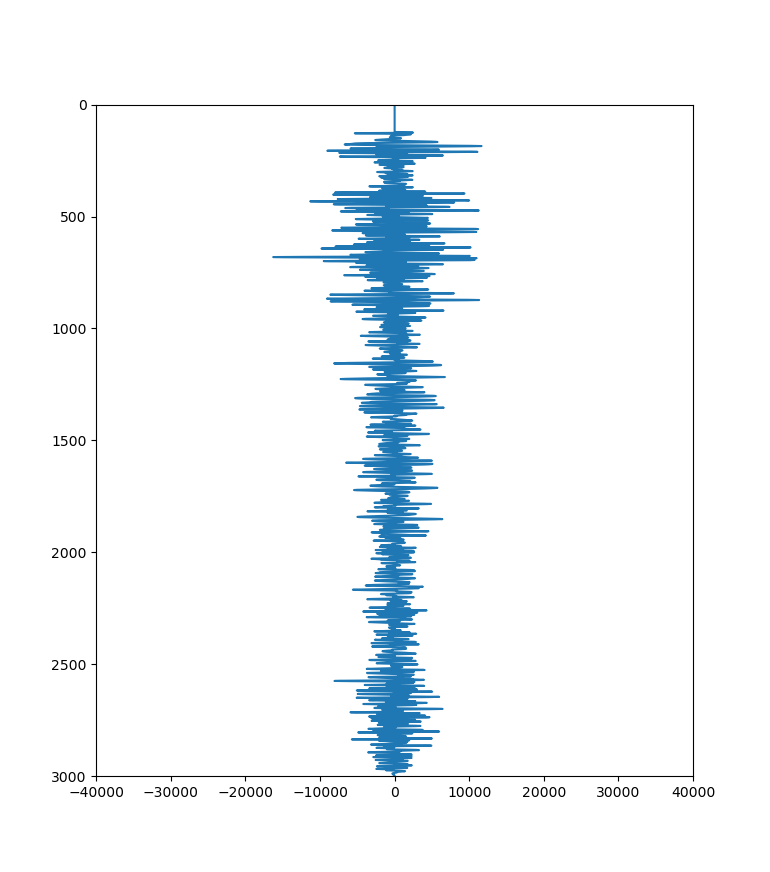

1
1
1
1


In [84]:

display(itrace,il_Slider,xl_Slider,z_Slider,colormap,interpolation,vmin,vmax,filters)#iBP,LB,HB,
il_plot(src.ilines[0],colormap.value,interpolation.value,clear=True)
t=1
#display(xl_Slider,colormap,interpolation)
#xl_plot(src.xlines[0],colormap.value,interpolation.value,changecmap=True)
#display(z_Slider,colormap,interpolation)
#z_plot(0,colormap.value,interpolation.value,changecmap=True)